### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# GISH

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish




## GISH of monocentric chromosomes

You need the data.frame of chr. sizes, and a d.f. of marks 
### Chr. sizes:

In [4]:
parentalAndHybChrSize

OTU           chrName shortArmSize longArmSize
1  Parental 1    1       3.2          4          
2  Parental 1    4       1.5          2          
3  Parental 1    5       4.8          6          
4  Parental 1    6       6.1          7          
8  Allopolyploid 1       3.2          4          
9  Allopolyploid 2       4.5          5          
10 Allopolyploid 3       2.0          3          
11 Allopolyploid 4       1.5          2          
12 Allopolyploid 5       4.8          6          
13 Allopolyploid 6       6.1          7          
5  Parental 2    1       3.2          4          
6  Parental 2    2       4.5          5          
7  Parental 2    3       2.0          3

</div>

<div class="verysmall">

### Marks' positions data 

In [5]:
dfAlloParentMarks

OTU           chrName markName   chrRegion
1  Allopolyploid 1       Parental 1 p        
2  Allopolyploid 1       Parental 2 q        
3  Allopolyploid 1       Parental 2 cen      
4  Allopolyploid 2       Parental 2 w        
5  Allopolyploid 3       Parental 2 w        
6  Allopolyploid 4       Parental 1 w        
7  Allopolyploid 5       Parental 1 w        
8  Allopolyploid 6       Parental 1 w        
9  Parental 1    6       Parental 1 w        
10 Parental 1    5       Parental 1 w        
11 Parental 1    1       Parental 1 w        
12 Parental 1    4       Parental 1 w        
13 Parental 2    2       Parental 2 w        
14 Parental 2    1       Parental 2 w        
15 Parental 2    3       Parental 2 w

</div>
<div class="verysmall">

</div>

In [6]:
# We will use column note to add a note to the right of the karyotype of the 
# OTU in column OTU
notesdf2<-read.table(text=
"           OTU                note
\"Parental 1\"     \"Parental One\"  
\"Parental 2\"     \"Parental Two\"  
\"Allopolyploid\"  Allopolyploid  ", header=TRUE, stringsAsFactors=FALSE,fill=TRUE)
notesdf2

OTU           note         
1 Parental 1    Parental One 
2 Parental 2    Parental Two 
3 Allopolyploid Allopolyploid

### Plotting 

<div class="fold s">

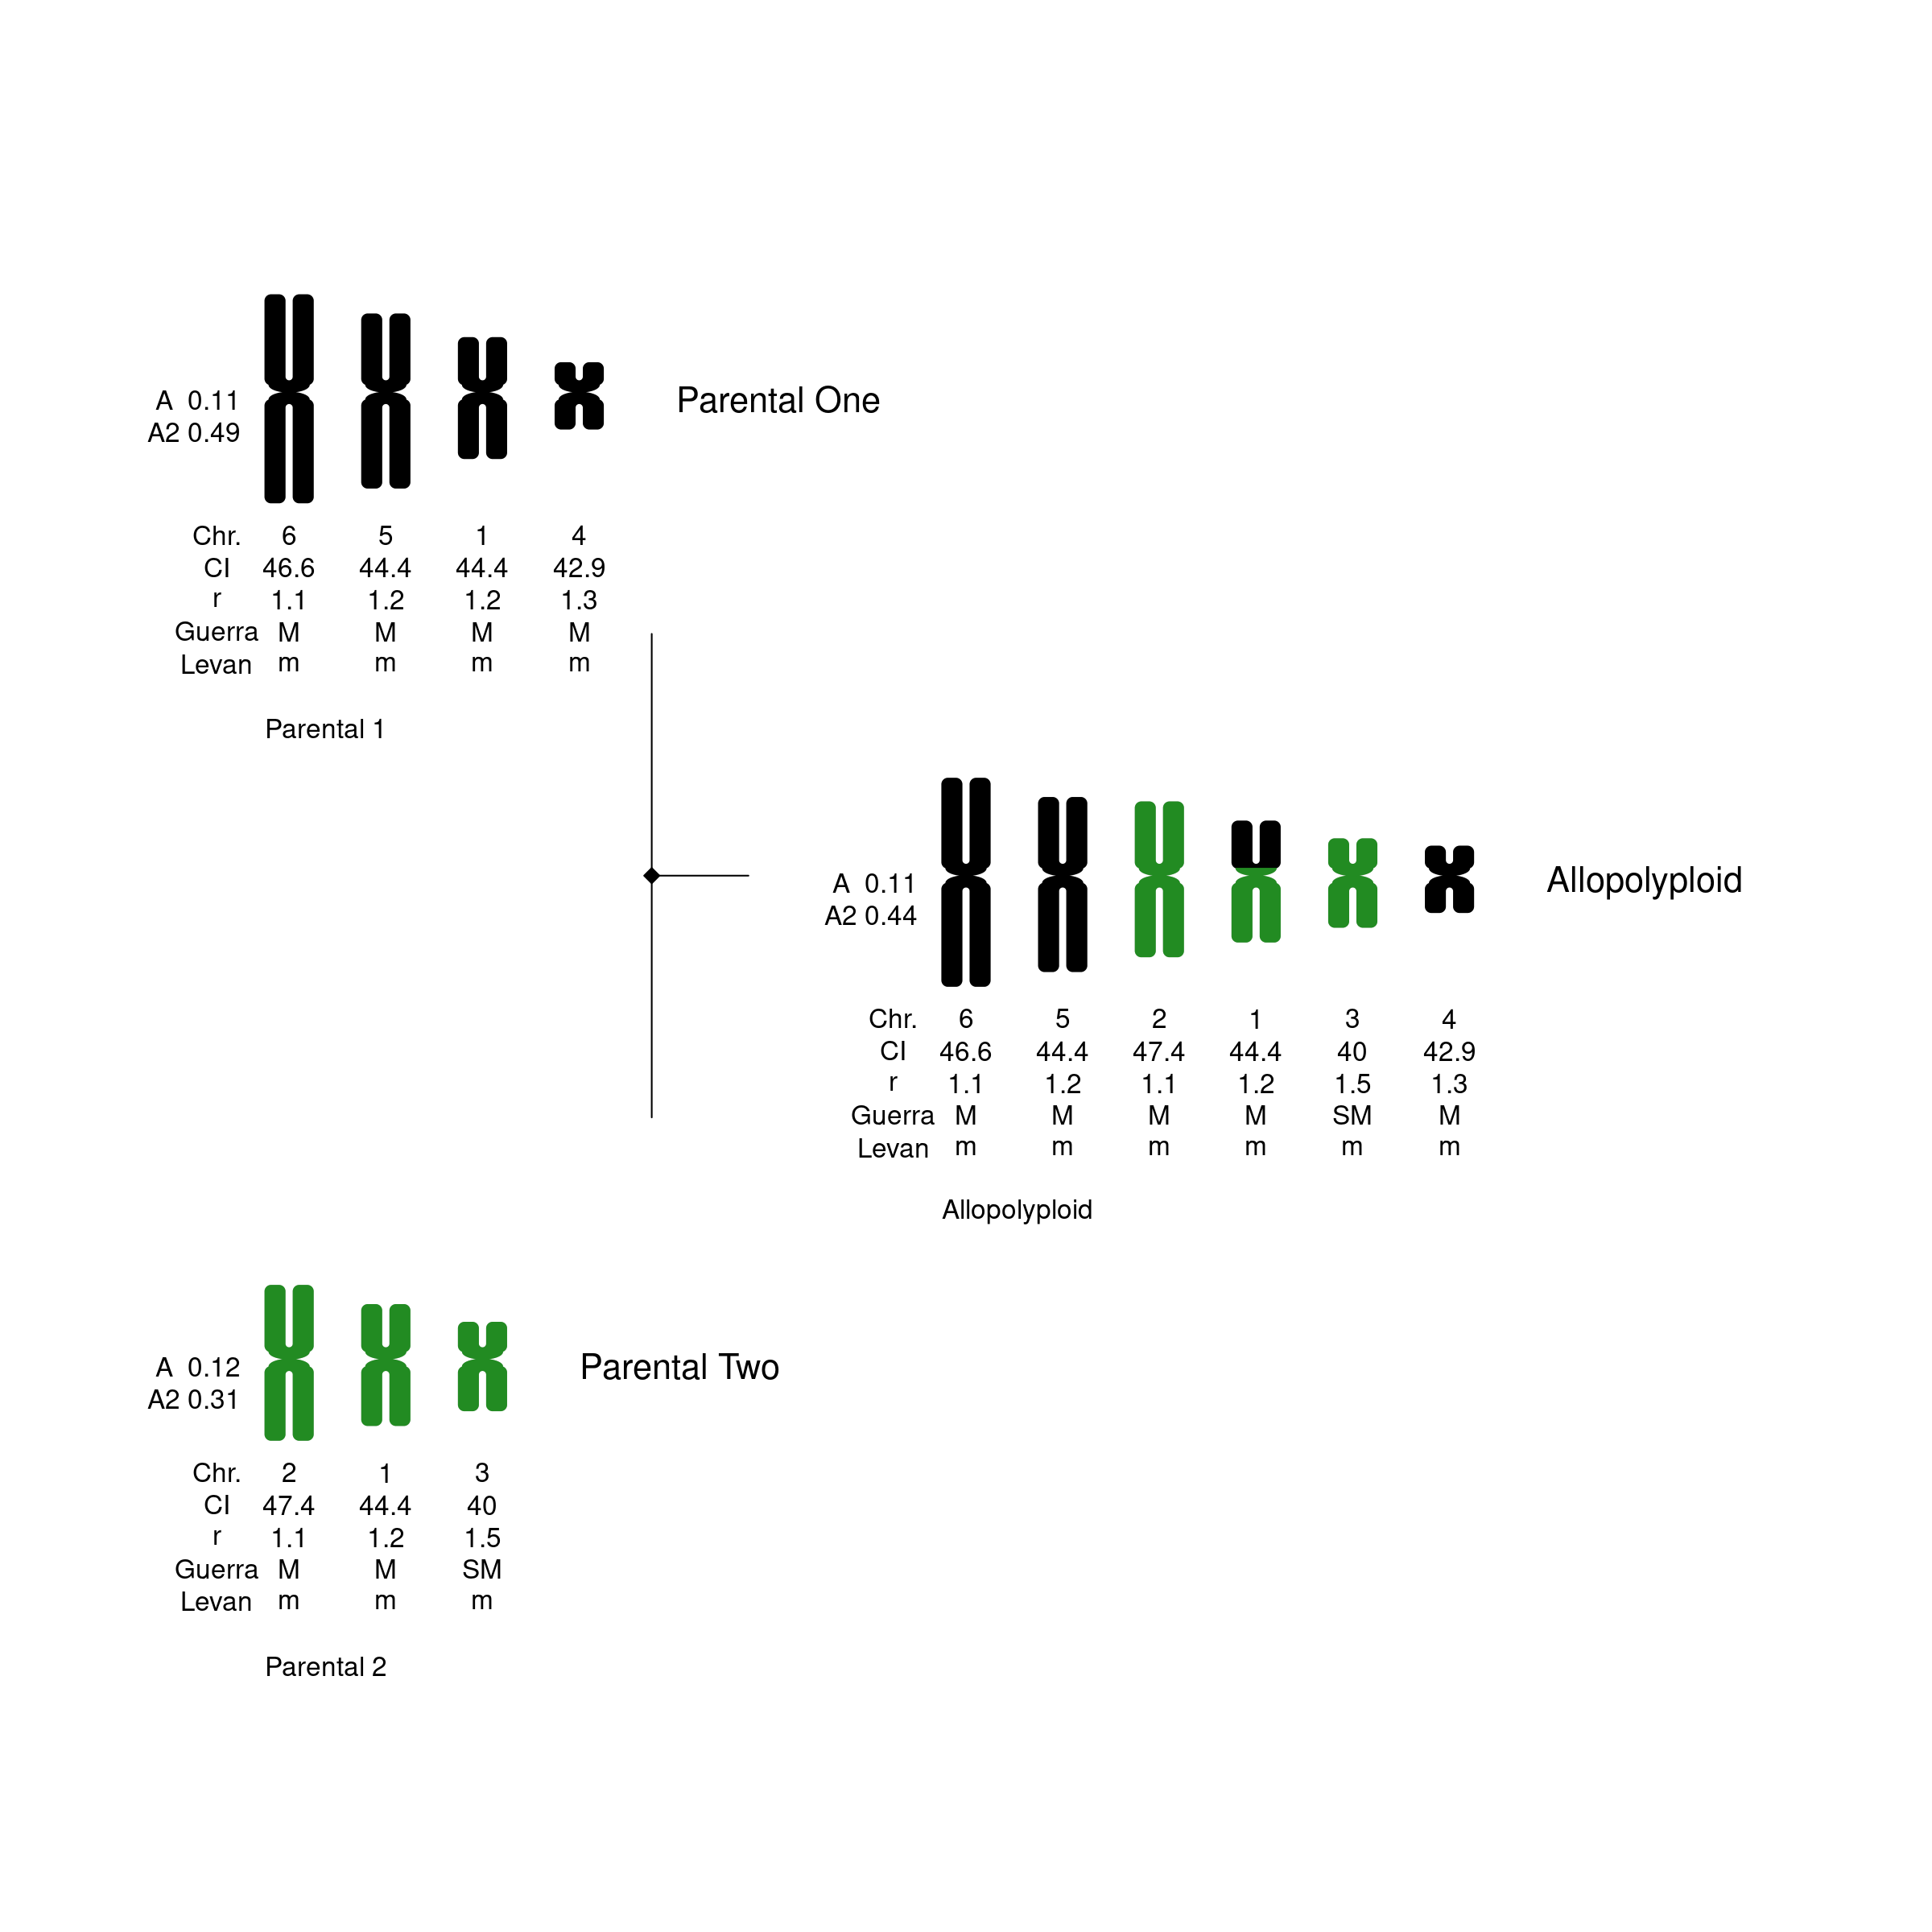

In [26]:
# svg("gish.svg",width=7,height=9 )
#png("parentalAndHybChrSize.png", width=700, height=900)

# REORDER OTUs

parentalAndHybChrSize$OTU<-factor(parentalAndHybChrSize$OTU,levels=c("Parental 1", "Allopolyploid","Parental 2") )

parentalAndHybChrSize<-parentalAndHybChrSize[order(parentalAndHybChrSize$OTU),]

par(mar=rep(0,4) )
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize = parentalAndHybChrSize,  # d.f. of chr. sizes
              dfMarkPos = dfAlloParentMarks,      # d.f. of marks' positions
              cenColor  = NULL,            # no cen. color for GISH
              
              karHeiSpace=5,               # karyotype height including spacing
              karSepar = FALSE,            # equally sized (height) karyotypes
              
              legend=""                   # no legend
              
              ,notes=notesdf2              # data.frame with notes NEW
              #,OTUasNote=TRUE             # TRY THIS (OTU name to the right)
              ,notesTextSize = 1.3         # font size of notes
              ,notesPosX = 1.5              # space from chr. (right) to note
              ,ruler = FALSE       
              
              ,moveKarHor = "Allopolyploid"# OTU to move to the right
              ,mkhValue = 7                # amount to move to right
              ,anchor = TRUE               # show anchor for moveKarHor OTUs
              ,moveAnchorV = 4             # modify anchor Vertical portion position
              ,moveAnchorH = -1.5          # modify anchor Horizon. portion position  
              
              ,ylimBotMod = 1              # ylim bottom argument mod.
              ,xlimRightMod = 4
)
)
# dev.off()

## GISH of holocentric chromosomes

You need the data.frame of chr. sizes, and a d.f. of marks 

### Chr. sizes: 

In [8]:
parentalAndHybHoloChrSize

OTU           chrName chrSize
1  Parental 1    7       4      
2  Parental 1    4       2      
3  Parental 1    5       6      
4  Parental 1    6       7      
5  Parental 2    1       4      
6  Parental 2    2       5      
7  Parental 2    3       3      
8  Allopolyploid 7       4      
9  Allopolyploid 2       5      
10 Allopolyploid 3       3      
11 Allopolyploid 4       2      
12 Allopolyploid 5       6      
13 Allopolyploid 6       7

</div>
<div class="verysmall">

### Marks' positions data 


In [9]:
dfAlloParentMarksHolo

OTU           chrName markName   chrRegion
1  Allopolyploid 7       Parental 1 w        
4  Allopolyploid 2       Parental 2 w        
5  Allopolyploid 3       Parental 2 w        
6  Allopolyploid 4       Parental 1 w        
7  Allopolyploid 5       Parental 1 w        
8  Allopolyploid 6       Parental 1 w        
9  Parental 1    6       Parental 1 w        
10 Parental 1    5       Parental 1 w        
11 Parental 1    7       Parental 1 w        
12 Parental 1    4       Parental 1 w        
13 Parental 2    2       Parental 2 w        
14 Parental 2    1       Parental 2 w        
15 Parental 2    3       Parental 2 w

</div>

<div class="verysmall">

### Plotting

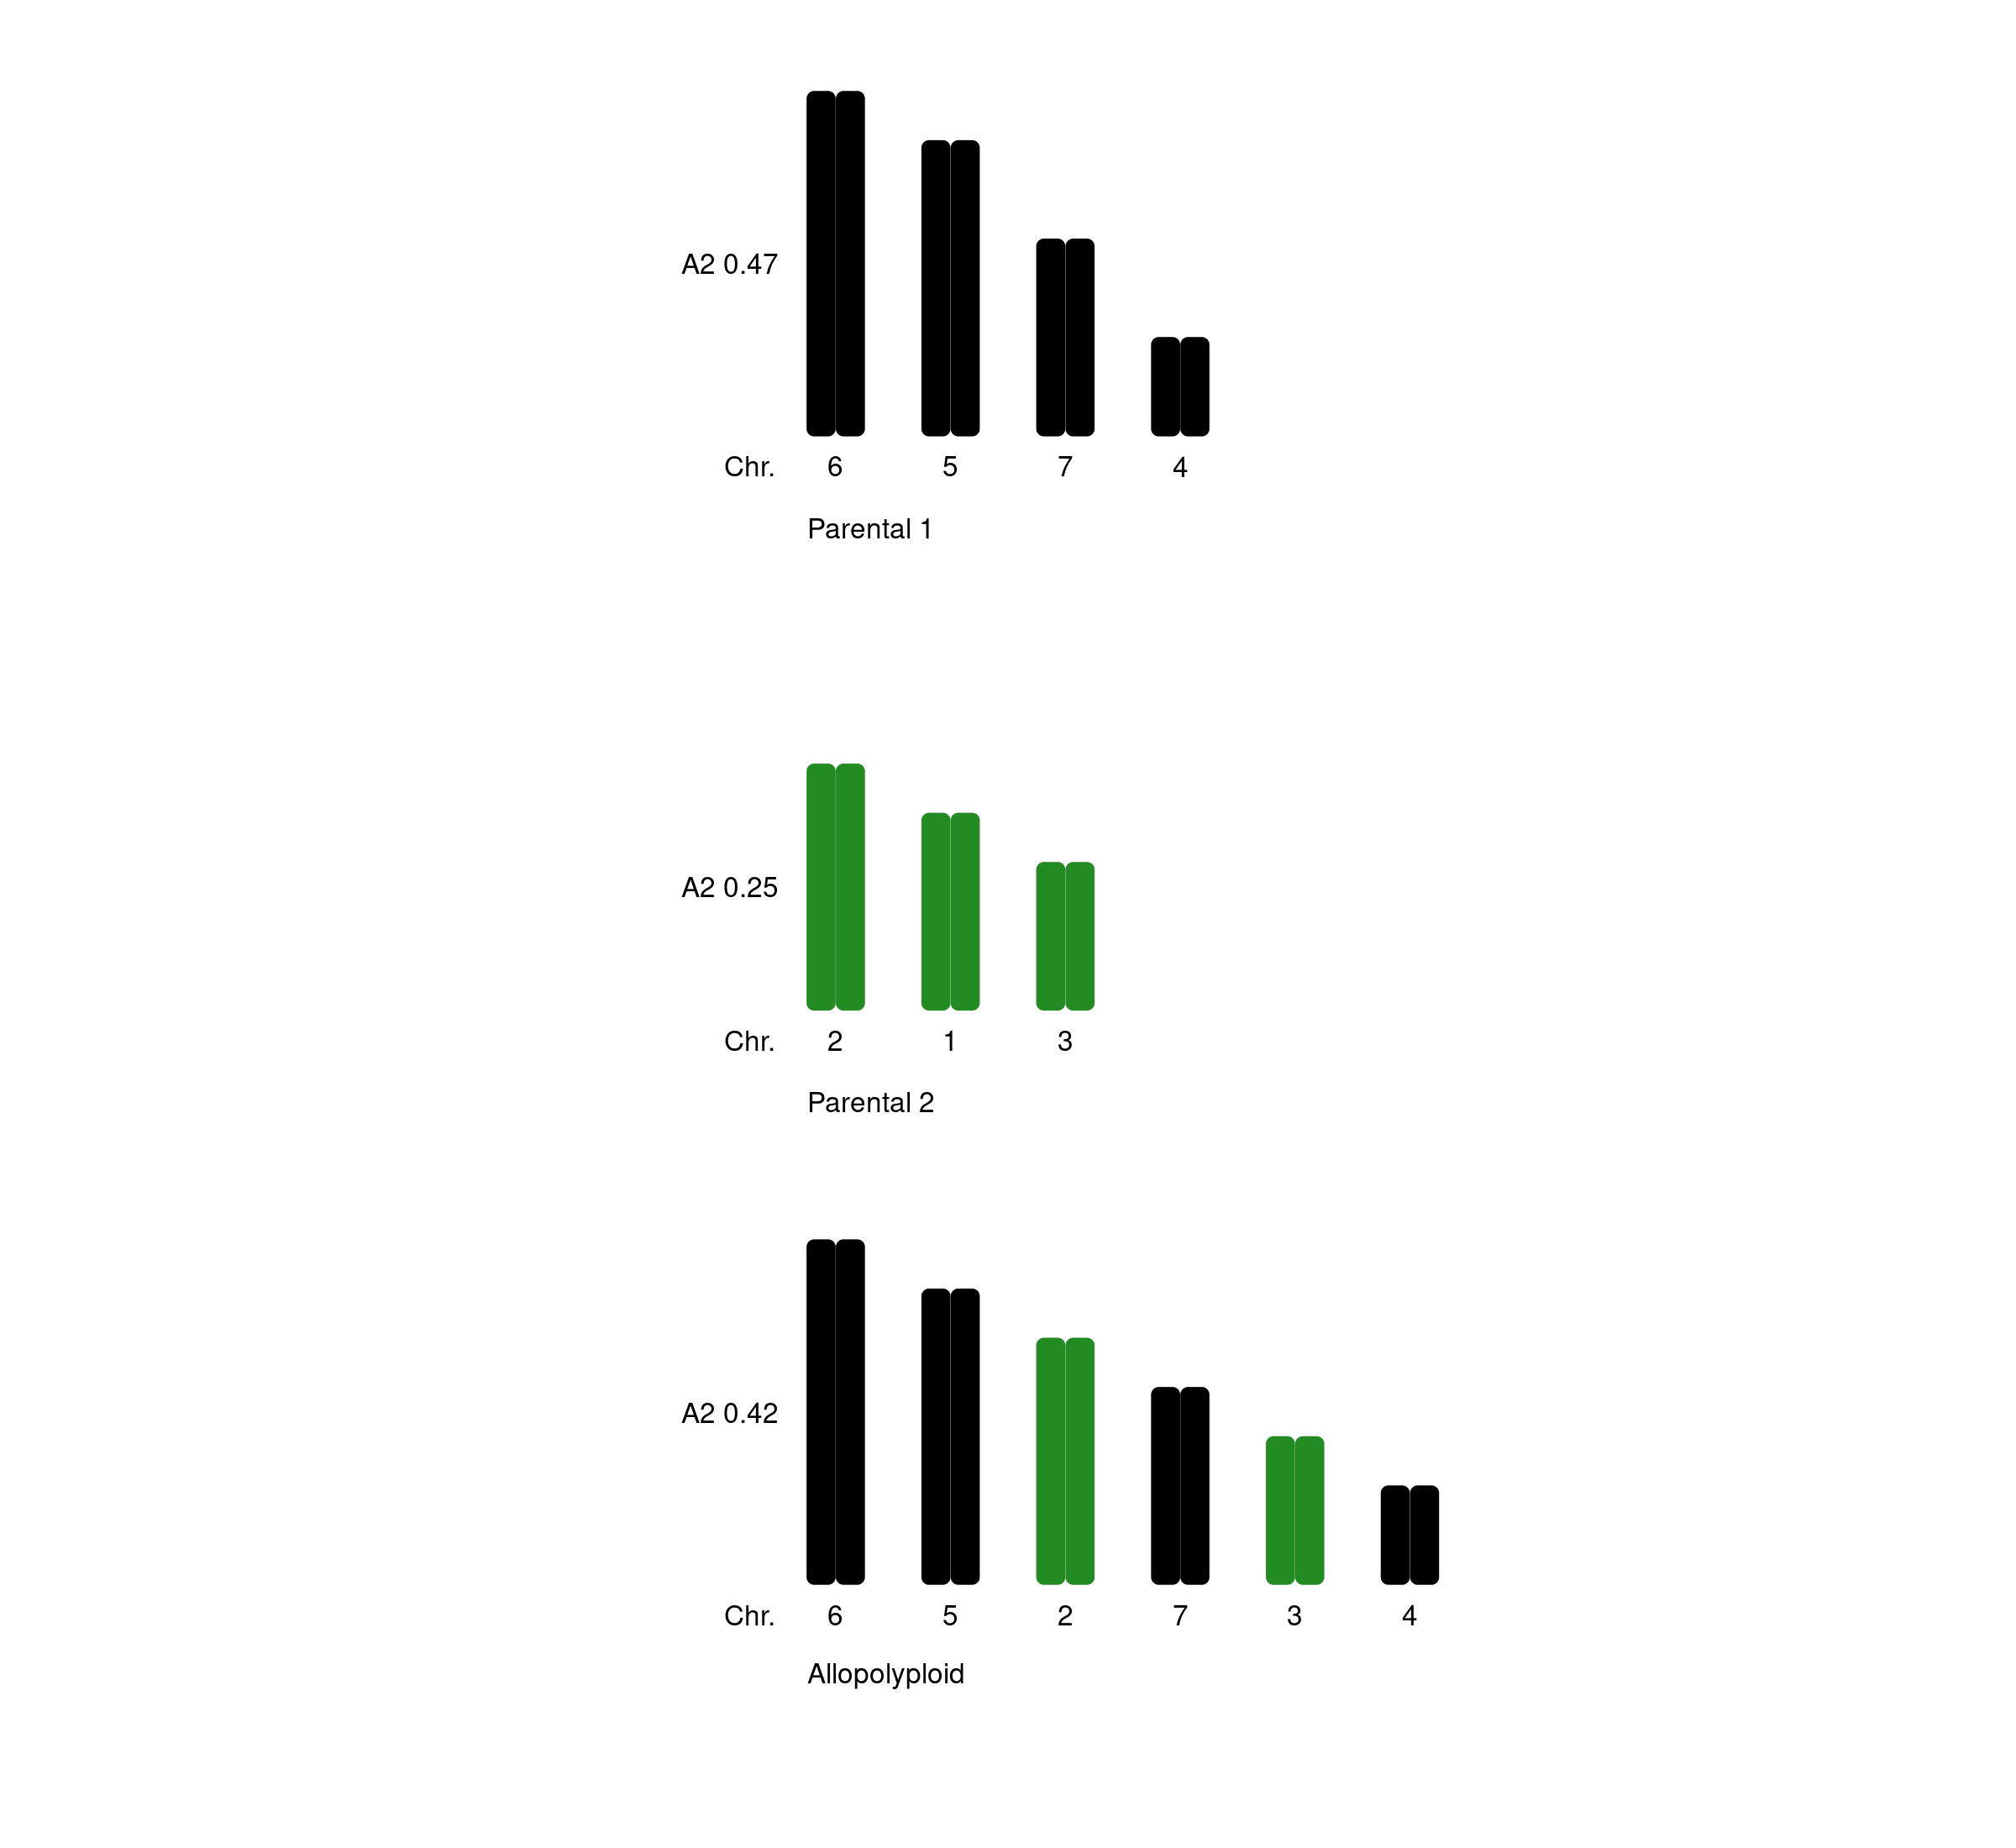

In [25]:

# svg("gish.svg",width=8,height=7 )
par(mar=c(0,0,0,0)) 

options(repr.plot.width = 12, repr.plot.height = 11, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize = parentalAndHybHoloChrSize,  # d.f. of chr. sizes
              dfMarkPos = dfAlloParentMarksHolo,      # d.f. of marks' positions
              chrColor  = "gray",          # chr. color
              cenColor  = NULL,            # cen. color when GISH
              
              karHeight = 3,               # karyotype height without spacing
              karHeiSpace=5,               # karyotype height including spacing
              distTextChr = 0.8            # separation among chr. and text
              
              ,ruler=FALSE                 # no ruler
              ,legend=""                   # no legend
              
              ,xlimRightMod = 0            # xlim right arg. modif.
              ,xModifier = 100             # separ. among chromatids
)
)
# dev.off()

## GISH of *Citrus* as Yasuda et al. [-@Yasuda2010]

For more details on the use of *Citrus* functions go to chapter *Citrus*

Parental *C. schweinfurthii*: 14D + 4F (using Guerra nomenclature).


In [11]:
{
#
# c. schweinfurthii chr sizes d.f.
#

cschweinformula<-"14D + 4F"
require(idiogramFISH)

citrusschwein <- citrusSize(D=14,
                            F=4 
                            ,OTU="C. schweinfurthii"
                            ,longArm=1.2)

#
# c. schweinfurthii CMA and GISH marks
#

citrusschweinMarkPosDF <- citrusMarkPos(citrusschwein)

#
#   data.frame of genomic marks
#
citrusschweinMarkPosDF2 <- data.frame(chrName=c(paste0("D_",1:7),paste0("F_",1:2)),
                                    chrRegion="w"
                                    ,markName="schweingenome"
                                    ,OTU=unique(citrusschwein$OTU)
)

#
#   merge marks pos.
#

citrusschweinMarkPosDF <- dplyr::bind_rows(citrusschweinMarkPosDF2,citrusschweinMarkPosDF)

#
#   Inversion of some chr. (D marks up)
#

csSwap <- swapChrRegionDfSizeAndMarks(citrusschwein,citrusschweinMarkPosDF,c(paste0("D_",1:14) ) )
citrusschwein         <- csSwap$dfChrSize
citrusschweinMarkPosDF<- csSwap$dfMarkPos

#
#   mark style
#

unique(citrusschweinMarkPosDF$markName)
{
  markStyleschweinDF   <- makedfMarkColorMycolors(
    unique(citrusschweinMarkPosDF$markName), c("chartreuse3","darkgoldenrod1") )
}

#
#   d.f. of notes
#

leftNotesschwein  <- data.frame(OTU=unique(citrusschwein$OTU), note= paste0("Female gamete: 7D + 2E" ) )
leftNotesschweinUp<- data.frame(OTU=unique(citrusschwein$OTU)
                                , note= paste0(unique(citrusschwein$OTU)," (",cschweinformula,")" ) )
notesschwein<- data.frame(OTU=unique(citrusschwein$OTU), note= "Yasuda et al. (2010)" )
}

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



Parental 'Nanpu' tangor


In [12]:

{
  
cnanpuformula<-"1A + 4C + 5D + 8F" # Guerra nom.

#
# 'Nanpu' tangor chr. sizes
#

citrusnanpu <- citrusSize(A=1,C=4,D=5,F=8 # 
                            ,OTU="nanpu tangor"
                            ,longArm=1.2)
#
# c. nanpu CMA marks
#

citrusnanpuMarkPosDF <- citrusMarkPos(citrusnanpu)

#
#   d.f. of genomic marks
#

citrusnanpuMarkPosDF2 <- data.frame(chrName = c("A","C_1",paste0("D_",1:4), paste0("F_",1:3) ),
                                    chrRegion="w"
                                    ,markName="nanpugenome"
                                    ,OTU=unique(citrusnanpu$OTU)
)

#
#   merge marks pos.
#

citrusnanpuMarkPosDF <- dplyr::bind_rows(citrusnanpuMarkPosDF2,citrusnanpuMarkPosDF)

#
#   mark style d.f.
#

unique(citrusnanpuMarkPosDF$markName)
{
  markStylenanpuDF   <- makedfMarkColorMycolors(
    unique(citrusnanpuMarkPosDF$markName), c("chocolate","darkgoldenrod1") )
}

#
#   invert some chr.
#

csSwap<-swapChrRegionDfSizeAndMarks(citrusnanpu,citrusnanpuMarkPosDF,c(paste0("D_",1:5) ) )
citrusnanpu          <- csSwap$dfChrSize
citrusnanpuMarkPosDF <- csSwap$dfMarkPos

#
#   notes data.frames
#

leftNotesnanpu  <- data.frame(OTU=unique(citrusnanpu$OTU), note= paste0("Male gamete: 1A + 1C + 4D + 3E" ) )
leftNotesnanpuUp<- data.frame(OTU=unique(citrusnanpu$OTU), note= paste0("'Nanpu' tangor (",cnanpuformula,")" ) )

notesnanpu<- data.frame(OTU=unique(citrusnanpu$OTU), note= "Yasuda et al. (2010)" )

}

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



</div>

Merge data.frames from parentals

In [16]:
{ 
bothParentalsChr   <- dplyr::bind_rows(citrusnanpu, citrusschwein)

bothParentalsMarks <- dplyr::bind_rows(citrusschweinMarkPosDF, citrusnanpuMarkPosDF)

bothPmarkStyle     <- unique(dplyr::bind_rows(markStyleschweinDF, markStylenanpuDF) )

bothPleftNotesUp   <- dplyr::bind_rows(leftNotesschweinUp,leftNotesnanpuUp)

bothPleftNotes     <- dplyr::bind_rows(leftNotesschwein,leftNotesnanpu)
}


data.frames of the hybrid

In [17]:
{
cschnanpuformula<-"1A + 1C + 11D + 5F"

require(idiogramFISH)

#
#   hybrid chr. size
#

citrusschnanpu <- citrusSize(A=1,C=1,D=11,F=5 # 
                          ,OTU="schweinfurthii + nanpu"
                          ,longArm=1.2)
#
# hybrid CMA marks
#

citrusschnanpuMarkPosDF <- citrusMarkPos(citrusschnanpu)

#
#    invert some chr.
#

csSwap<-swapChrRegionDfSizeAndMarks(citrusschnanpu,citrusschnanpuMarkPosDF,c(paste0("D_",1:11) ) )
citrusschnanpu         <- csSwap$dfChrSize
citrusschnanpuMarkPosDF<- csSwap$dfMarkPos

#
#   d.f. of gish marks
#

citrusschnanpuMarkPosDF2 <- data.frame(chrName=c(paste0("D_",5:11), paste0("F_",1:2) ),
                                    chrRegion="w"
                                    ,markName="schweingenome"
                                    ,OTU=unique(citrusschnanpu$OTU)
)

citrusschnanpuMarkPosDF3 <- data.frame(chrName=c("A","C",paste0("D_",1:4), paste0("F_",3:5) ),
                                       chrRegion="w"
                                       ,markName="nanpugenome"
                                       ,OTU=unique(citrusschnanpu$OTU)
)

#
#   merge marks
#

citrusschnanpuMarkPosDF <- dplyr::bind_rows(citrusschnanpuMarkPosDF2,citrusschnanpuMarkPosDF3,citrusschnanpuMarkPosDF)

#
#   style of marks d.f.
#

unique(citrusschnanpuMarkPosDF$markName)
{
  markStyleschnanpuDF   <- makedfMarkColorMycolors(
    unique(citrusschnanpuMarkPosDF$markName), c("chartreuse3","chocolate","darkgoldenrod1") )
}

#
#   notes for hybrid
#
                         # italics!       #  rest: \"                 to                           \"      
name <-  paste0("italic('C. schweinfurthii'),      \" × 'Nanpu' tangor (CN3) (", cschnanpuformula,")\"" ) 
# to parse italics, use parseStr2lang = TRUE

leftNotesschnanpuUp <- data.frame(OTU=unique(citrusschnanpu$OTU), note= name  )
notesschnanpu       <- data.frame(OTU=unique(citrusschnanpu$OTU), note= "'Yasuda et al. (2010)'" )
}

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



</div>

Plot

<div class="fold s">

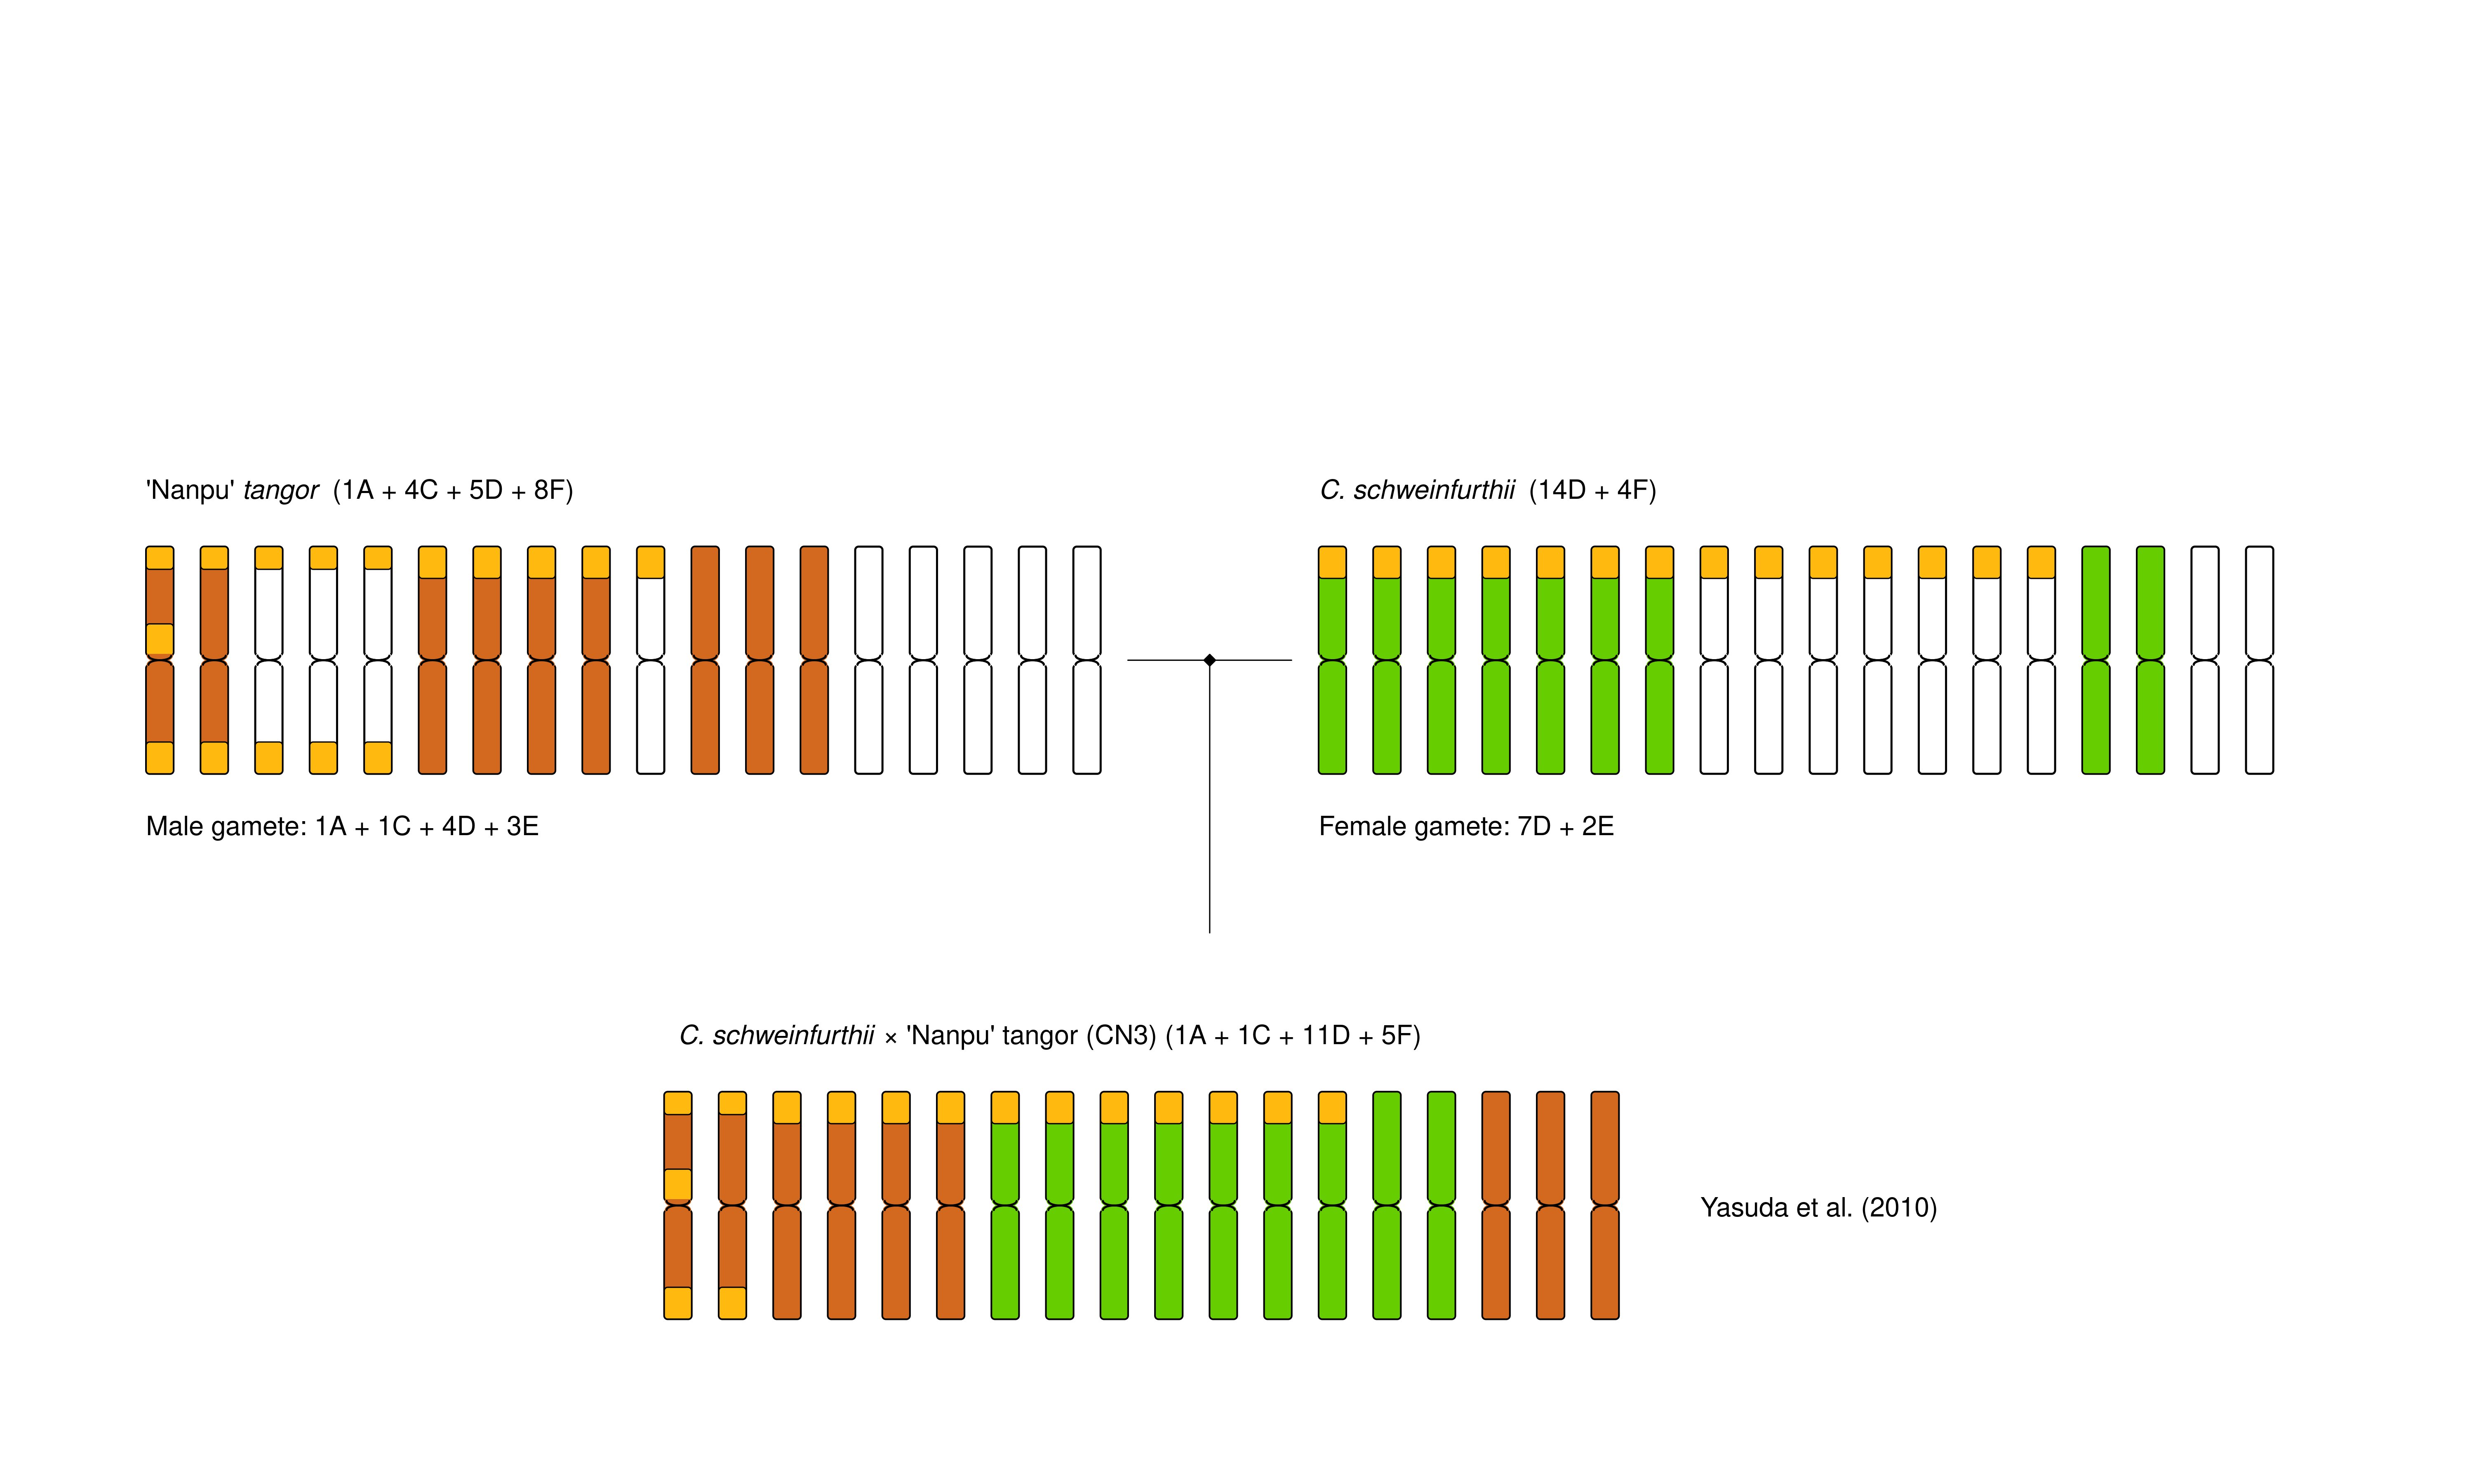

In [24]:

#
#   plot of parentals only
#

{
par(mar=rep(0,4), oma=rep(0,4) ) 

options(repr.plot.width = 20, repr.plot.height = 12, repr.plot.res = 300)
suppressMessages(
plotIdiograms(callPlot=T,
              dfChrSize= bothParentalsChr,   # chr. size data.frame
              dfMarkPos= bothParentalsMarks, # mark position data.frame 
              dfMarkColor=bothPmarkStyle,    # mark style d.f.
              
              orderChr = "original"   # order of chr. as in d.f.
              
              ,chrWidth = .5          # chr. width
              ,chrSpacing=.5          # separ. among chr.
              ,karHeight=4            # kar. height
              ,karHeiSpace=5          # anchor height
              
              ,chromatids = FALSE     # don't use chromatids
              ,chrColor= "white"      # chr. color
              
              ,ruler=FALSE            # don't use ruler
              ,chrId=""               # don't use chr. name
              ,chrIndex = ""          # don't use chr. indices
              ,morpho=""              # don't use morphology
              ,karIndex = FALSE       # don't use kar. indices
              ,colorBorderMark="black"# color of border of marks
              ,addOTUName = F         # do not add OTU names
              
              ,lwd.chr = 1.6          # border width
              ,lwd.marks=1            # border width marks
              ,gishCenBorder=T        # cen. border of gish as mark color
              ,hideCenLines=1.75      # hide cen. border
              
              ,legend=""              # no legend for marks
              
              ,leftNotes   = bothPleftNotes   # data.frame with left notes
              ,leftNotesUp = bothPleftNotesUp # data.frame with Up left notes
              ,leftNoteFontUp = 3             # italics
              
              ,leftNotesTextSize = 1.3     # font size of notes
              ,leftNotesUpTextSize = 1.3   # font size of notes
              
              ,leftNotesPosX = 0      # horizontal pos. of left notes
              ,leftNotesPosY = 0      # vertical pos. of left down notes
              
              ,leftNotesUpPosX = 0    # horizontal pos. of left up notes
              ,leftNotesUpPosY = 2    # vertical pos. of left up notes
              
              ,verticalPlot=FALSE     # horizontal plot
              ,karSpaceHor=3          # horizontal spacing among kar.
              
              ,karAnchorLeft = "C. schweinfurthii" # anchor to the left of
              ,anchor=TRUE            # add anchor
              
              ,ylimBotMod = 1         # modify ylim bottom argument
              ,ylimTopMod = 0         # modify ylim top argument
              ,xlimLeftMod =0         # modify left xlim
              ,xlimRightMod = 2       # modify right xlim
              
)
)
}

#  add plot of hybrid over parents plot

{
suppressMessages(
     plotIdiograms(callPlot=FALSE,                     # plot over previous plot
                  dfChrSize= citrusschnanpu,          # chr. size data.frame
                  dfMarkPos= citrusschnanpuMarkPosDF, # mark position data.frame 
                  dfMarkColor=markStyleschnanpuDF,    # mark style d.f.
                  
                  orderChr = "original",  # order of chr. as in d.f.
                  
                  chrWidth = .5,          # chr. width
                  chrSpacing=.5,          # separ. among chr.
                  karHeight=4             # kar. height 
                  ,chromatids = FALSE     # don't use chromatids
                  ,chrColor= "white"      # chr. color
                  
                  ,ruler=FALSE            # don't use ruler
                  ,chrId=""               # don't use chr. name
                  ,chrIndex = ""          # don't use chr. indices
                  ,morpho=""              # don't use morphology
                  ,karIndex = FALSE       # don't use kar. indices
                  ,colorBorderMark="black"# color of border of marks
                  ,addOTUName=F           # don't add OTU name
                  
                  ,lwd.chr = 1.6          # border width
                  ,lwd.marks=1            # border width marks
                  
                  ,leftNotesUp = leftNotesschnanpuUp # up notes: name of hybrid
                  ,parseStr2lang = TRUE        # for italics, see notes data.frame
                  ,notesTextSize = 1.3         # font size of notes
                  ,leftNotesUpTextSize = 1.3   # font size of notes
              
                  ,leftNotesPosX = 0      # horizontal pos. of notes
                  ,leftNotesUpPosY = 2    # vertical pos. left up notes
                  ,notes = notesschnanpu  # right notes - authors
                  ,notesPosX=3            # notes hor. pos
                  
                  ,ylimBotMod = 1         # modify ylim bottom argument
                  ,ylimTopMod = -5        # modify ylim top argument
                  ,xlimLeftMod = 0        # modify left xlim
                  ,xlimRightMod = 2       # modify right xlim
                  
                  ,gishCenBorder=T        # cen. border as mark color
                  ,legend=""              # no legend for marks
                  ,hideCenLines=1.75      # hide cen. lines
                  ,moveAllKarValueHor=9.5 # move kar. to right
                  ,moveAllKarValueY =-10  # move kar. down
    )
    )
  } # hybrid
